In [1]:
from getdist import plots
import getdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tests de base

In [2]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/"
run = getdist.loadMCSamples(path+'planckCL_PP_vJul2024_single_pipV',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)

C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data\planckCL_PP_vJul2024_single_pipV.1.txt
Removed 0.3 as burn in


<Figure size 900x675 with 0 Axes>

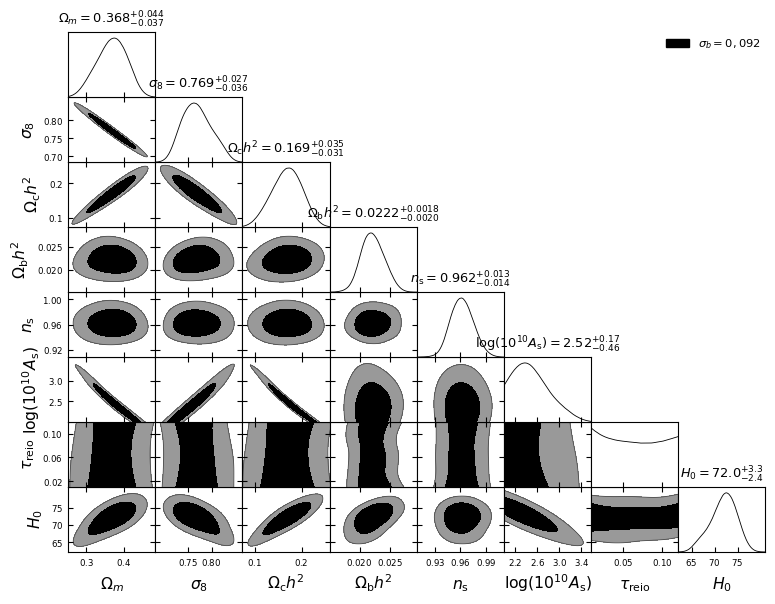

In [7]:
samples = [run]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","tau","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=[r"$\sigma_b = 0,092$", r"$\sigma_b = 0.046$", r"$\sigma_b = 0.023$"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "red"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Cosmo_tSZ.pdf')

<Figure size 900x675 with 0 Axes>

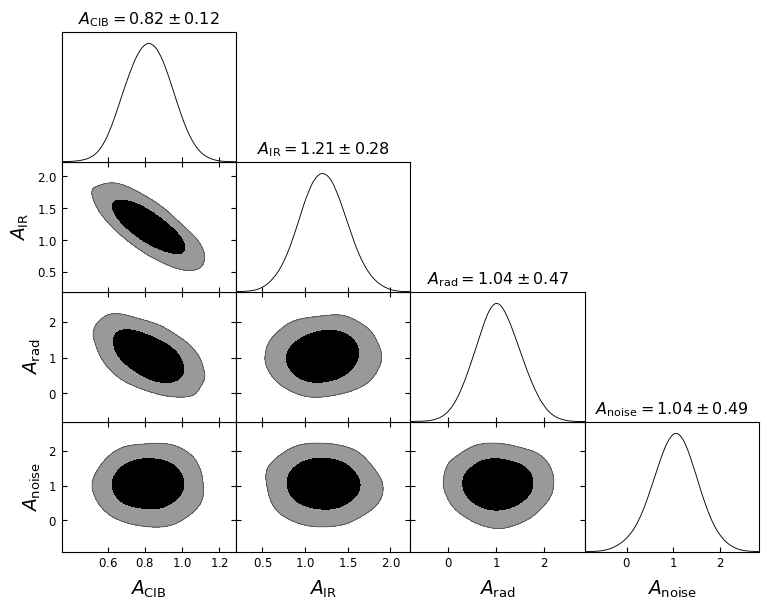

In [6]:
samples = [run]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["Arescib", "Aresir", "Aresrad", "Anoise"],   # Paramètres à afficher
    filled=[True],
    legend_labels=[],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('As_tSZ.pdf')

# Mock datas

## Comparaison des données

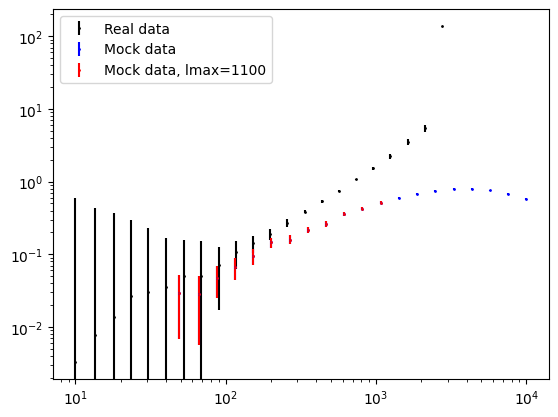

In [10]:
# Read the file ToMarian2.dat
real_data = pd.read_csv('ToMarian2.dat', delim_whitespace=True)
mock_data_lmax = pd.read_csv('Mock_A10_lmax1100.txt', delim_whitespace=True)
mock_data = pd.read_csv('Mock_A10.txt', delim_whitespace=True)

# Display the first few rows of the dataframe
real_l = real_data['ell']
real_Cl = real_data['clyy']
real_err = real_data['err']

mock_l = mock_data['ell']
mock_Cl = mock_data['clyy']
mock_err = mock_data['err_stat']

mock_lmax_l = mock_data_lmax['ell']
mock_lmax_Cl = mock_data_lmax['clyy']
mock_lmax_err = mock_data_lmax['err_stat']

plt.errorbar(real_l, real_Cl, yerr=real_err, fmt='o', color='black', label='Real data', markersize = 1)
plt.errorbar(mock_l, mock_Cl, yerr=mock_err, fmt='o', color='blue', label='Mock data', markersize = 1)
plt.errorbar(mock_lmax_l, mock_lmax_Cl, yerr=mock_lmax_err, fmt='o', color='red', label='Mock data, lmax=1100', markersize = 1)
plt.xscale('log')
plt.yscale('log')
plt.legend()

## Résultats

In [4]:
path = "C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/"
run_mock = getdist.loadMCSamples(path+'config_Mock_A10',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)
run_lmax1100 = getdist.loadMCSamples(path+'config_Mock_A10_lmax1100',
                                   settings={'ignore_rows':0.3} # Pour ignorer les 30% premières lignes
)

<Figure size 900x675 with 0 Axes>

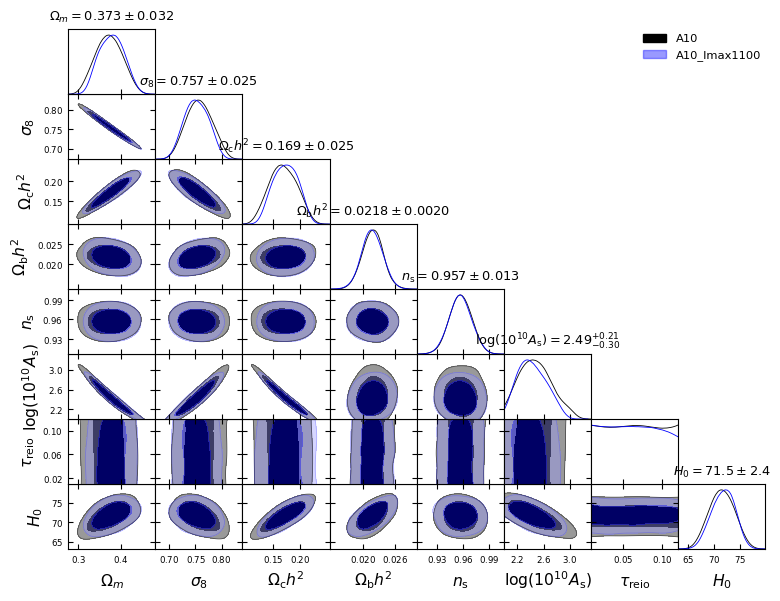

In [6]:
samples = [run_mock, run_lmax1100]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","tau","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=["A10", "A10_lmax1100"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "red"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Cosmo_tSZ_Mock.pdf')

<Figure size 900x675 with 0 Axes>

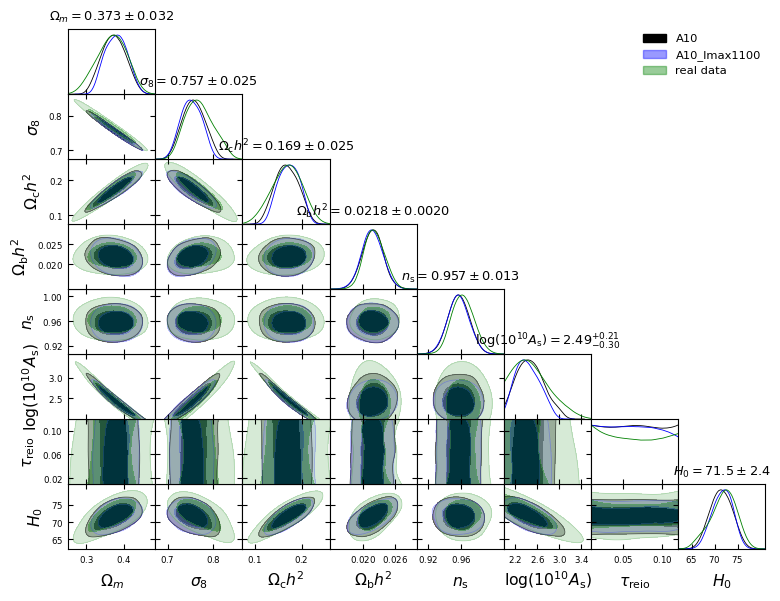

In [5]:
samples = [run_mock, run_lmax1100, run]  # Liste des échantillons auxquels on s'intéresse
g = plots.get_single_plotter(chain_dir=path, width_inch=9)  # width_inch = largeur de la figure

# Pour faire joli
g.settings.figure_legend_frame = False  # Cadre autour de la légende
g.settings.alpha_filled_add = 0.4   # ?
g.settings.title_limit_fontsize = 14    # Taille de la police du titre
g.settings.legend_fontsize = 13   # Taille de la police de la légende
g.settings.axes_labelsize = 16  # Taille de la police des labels des axes
# g.settings.xtick.labelsize = 14
# g.settings.ytick.labelsize = 14



# Plot
g.triangle_plot(
    samples,
    ["omegam", "sigma8", "omch2","ombh2","ns","logA","tau","H0"],   # Paramètres à afficher
    filled=[True],
    legend_labels=["A10", "A10_lmax1100", "real data"],  # 1 label par sample
    legend_loc="upper right",   # Position de la légende
    contour_colors=["black", "blue", "green"],  # Couleurs des contours
    title_limit=1,
    markers={"x2": 0},
)


g.export('Cosmo_tSZ_Mock.pdf')